## Crow Search Algorithm

In [1]:
import warnings 
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px 
import pandas as pd  
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split  
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import recall_score 
from sklearn.utils import resample  
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay 
from math import * 
import math 
import random 
import os 
%matplotlib inline
sns.set_style('darkgrid')

In [2]:
df = pd.read_csv('diabetes.csv')
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [3]:
print("Dimension Diabetes est : ==> ",df.shape)

Dimension Diabetes est : ==>  (768, 9)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe().T

count        mean         std     min       25%  \
Pregnancies               768.0    3.845052    3.369578   0.000   1.00000   
Glucose                   768.0  120.894531   31.972618   0.000  99.00000   
BloodPressure             768.0   69.105469   19.355807   0.000  62.00000   
SkinThickness             768.0   20.536458   15.952218   0.000   0.00000   
Insulin                   768.0   79.799479  115.244002   0.000   0.00000   
BMI                       768.0   31.992578    7.884160   0.000  27.30000   
DiabetesPedigreeFunction  768.0    0.471876    0.331329   0.078   0.24375   
Age                       768.0   33.240885   11.760232  21.000  24.00000   
Outcome                   768.0    0.348958    0.476951   0.000   0.00000   

                               50%        75%     max  
Pregnancies                 3.0000    6.00000   17.00  
Glucose                   117.0000  140.25000  199.00  
BloodPressure              72.0000   80.00000  122.00  
SkinThickness              23.0000   32.00000   99.00  
Insulin                    30.5000  127.25000  846.00  
BMI                        32.0000   36.60000   67.10  
DiabetesPedigreeFunction    0.3725    0.62625    2.42  
Age                        29.0000   41.00000   81.00  
Outcome                     0.0000    1.00000    1.00

In [6]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
corr_matrix = df.corr()
corr_matrix["Outcome"].sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64

<Axes: xlabel='DiabetesPedigreeFunction'>

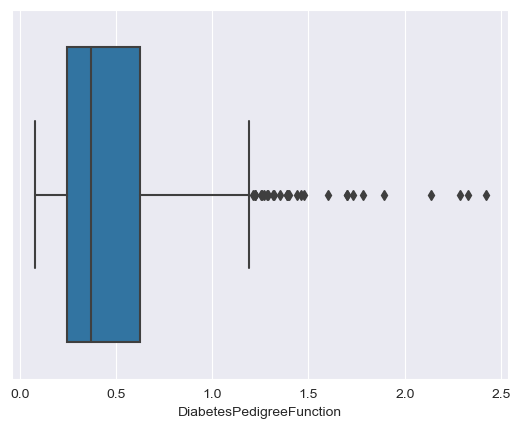

In [8]:
sns.boxplot(data=df, x="DiabetesPedigreeFunction")

<Axes: xlabel='Insulin'>

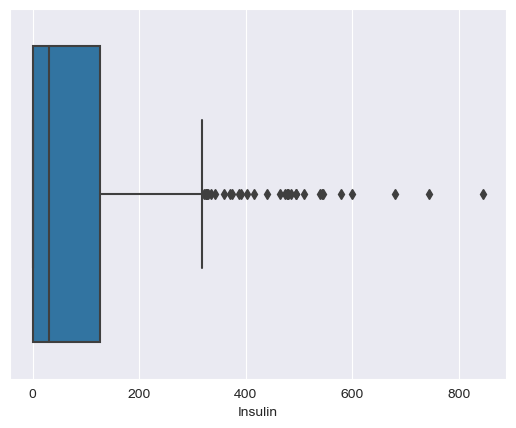

In [9]:
sns.boxplot(data=df, x="Insulin")

<Axes: xlabel='Glucose'>

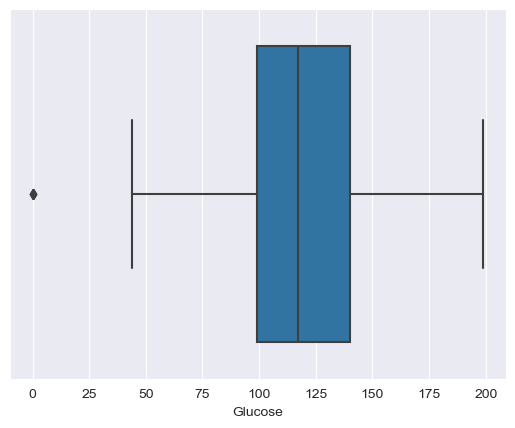

In [10]:
sns.boxplot(data=df, x="Glucose")

<Axes: xlabel='Pregnancies'>

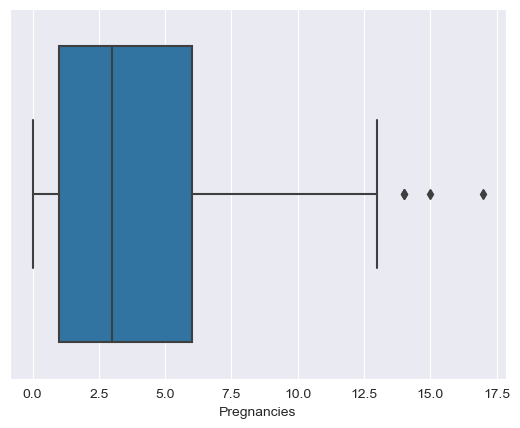

In [11]:
sns.boxplot(data=df, x="Pregnancies")

<Axes: xlabel='BloodPressure'>

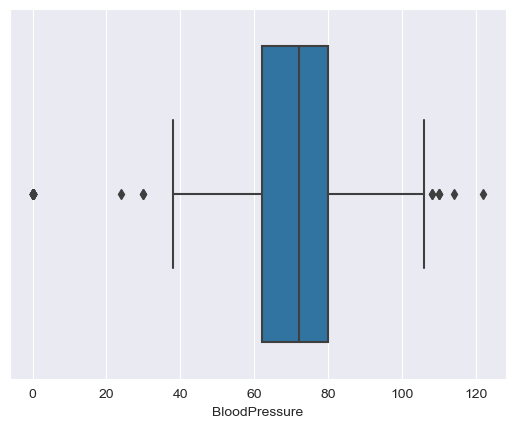

In [12]:
sns.boxplot(data=df, x="BloodPressure")

<Axes: xlabel='BMI'>

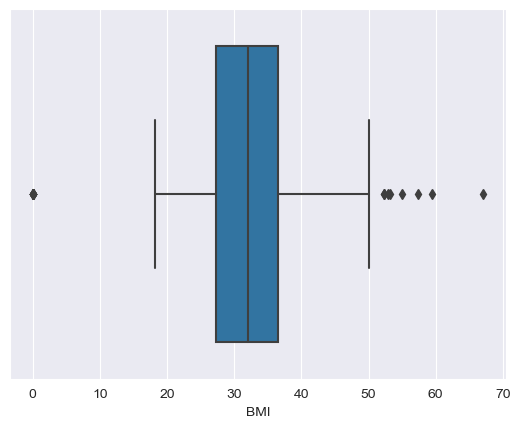

In [13]:
sns.boxplot(data=df, x="BMI")

In [14]:

for i in df[df['BloodPressure']==0]['BloodPressure'].index:
    df['BloodPressure'][i]=df['BloodPressure'].mean()
for i in df[df['SkinThickness']==0]['SkinThickness'].index:
    df['SkinThickness'][i]=df['SkinThickness'].mean()
for i in df[df['Insulin']==0]['Insulin'].index:
    df['Insulin'][i]=df['Insulin'].mean()
for i in df[df['BMI']==0]['BMI'].index:
    df['BMI'][i]=df['BMI'].mean()


In [15]:
df.iloc[7]

Pregnancies                  10.000000
Glucose                     115.000000
BloodPressure                69.105469
SkinThickness                20.589974
Insulin                      80.215914
BMI                          35.300000
DiabetesPedigreeFunction      0.134000
Age                          29.000000
Outcome                       0.000000
Name: 7, dtype: float64

<Axes: xlabel='SkinThickness'>

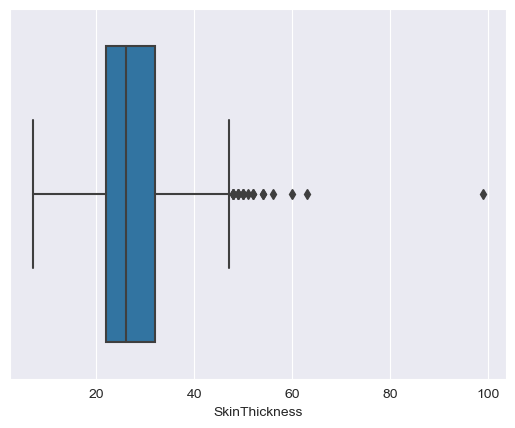

In [16]:
sns.boxplot(data=df, x="SkinThickness")

In [17]:
for i in df[df['Glucose']<2]['Glucose'].index:
    df['Glucose'][i]=df['Glucose'].mean()
df.describe() 

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.683657      72.325527      27.593560  129.823960   
std       3.369578   30.435978      12.103470       9.182155   89.597861   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.750000      64.000000      22.000000   87.837043   
50%       3.000000  117.000000      72.000000      26.000000  106.055607   
75%       6.000000  140.250000      80.000000      32.000000  129.360248   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    32.453800                  0.471876   33.240885    0.348958  
std      6.875237                  0.331329   11.760232    0.476951  
min     18.200000                  0.078000   21.000000    0.000000  
25%     27.500000                  0.243750   24.000000    0.000000  
50%     32.264327                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.128804       0.190368       0.036404   
Glucose                      0.128804  1.000000       0.243951       0.155734   
BloodPressure                0.190368  0.243951       1.000000       0.162324   
SkinThickness                0.036404  0.155734       0.162324       1.000000   
Insulin                      0.048758  0.428437       0.062615       0.305157   
BMI                          0.000659  0.225452       0.288551       0.546032   
DiabetesPedigreeFunction    -0.043242  0.090325       0.011032       0.085032   
Age                          0.607216  0.281417       0.369159       0.114324   
Outcome                      0.198689  0.481691       0.169744       0.186230   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies               0.048758  0.000659                 -0.043242   
Glucose                   0.428437  0.225

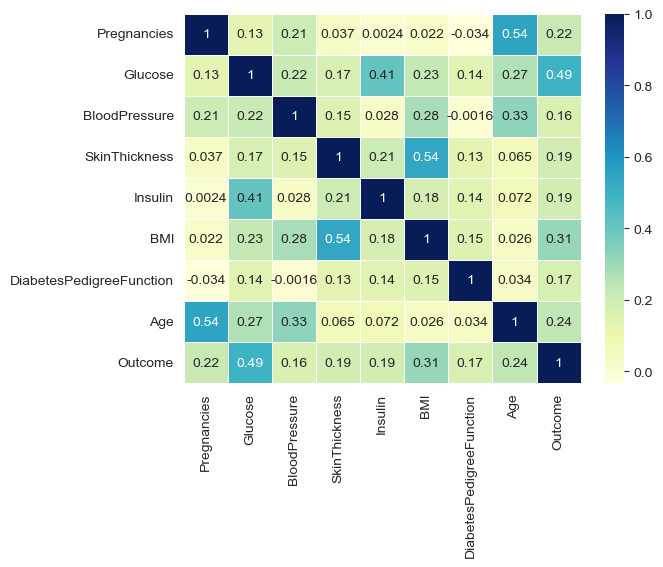

In [18]:
correlation = df.corr(method='pearson')
sns.heatmap(correlation, 
            xticklabels=correlation.columns,
            yticklabels=correlation.columns,
            cmap="YlGnBu",
            annot=True,
            linewidth=0.5)
spearman_correlation=df.corr(method='spearman')
print(spearman_correlation)
kendall_correlation=df.corr(method='kendall')
print(kendall_correlation)

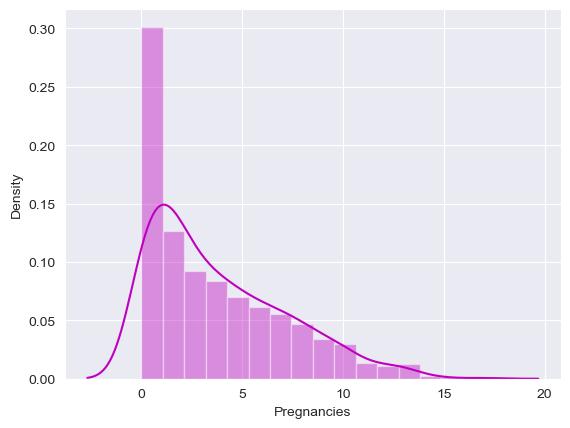

In [19]:
plot00=sns.distplot(df['Pregnancies'],color='m')

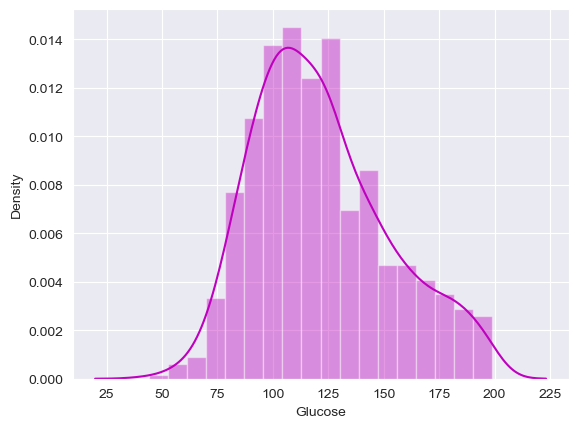

In [20]:
plot00=sns.distplot(df['Glucose'],color='m')

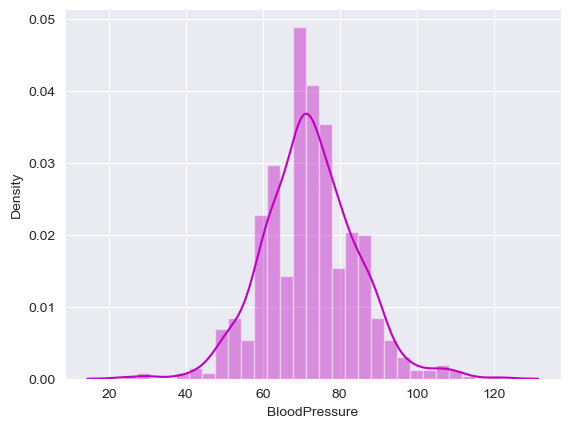

In [21]:
plot00=sns.distplot(df['BloodPressure'],color='m')

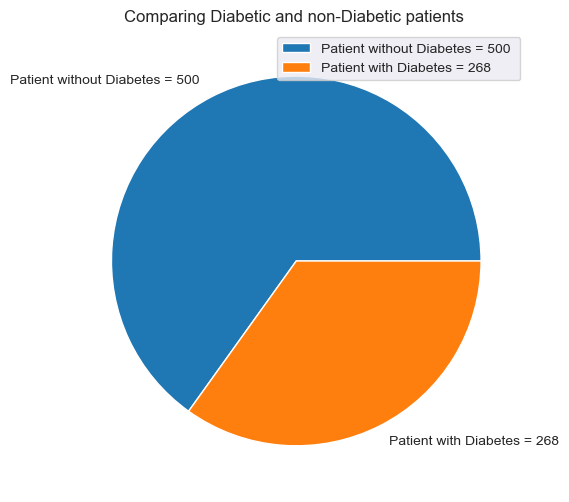

In [22]:
diabetes_count = np.array(df['Outcome'].value_counts(sort=True))
labels = ['Patient without Diabetes = 500 ', 'Patient with Diabetes = 268']
plt.figure(figsize=(8,6))
plt.pie(diabetes_count, labels=labels)
plt.legend()
plt.title('Comparing Diabetic and non-Diabetic patients ')
plt.show()

In [23]:
class_1=df[df['Outcome']==0]
class_2=df[df['Outcome']==1]

class_2_upsampled=resample(class_2,replace=True,n_samples=len(class_1),random_state=27)

upsampled=pd.concat([class_1,class_2_upsampled])
upsampled['Outcome'].value_counts()
data=upsampled


<Axes: xlabel='Outcome', ylabel='count'>

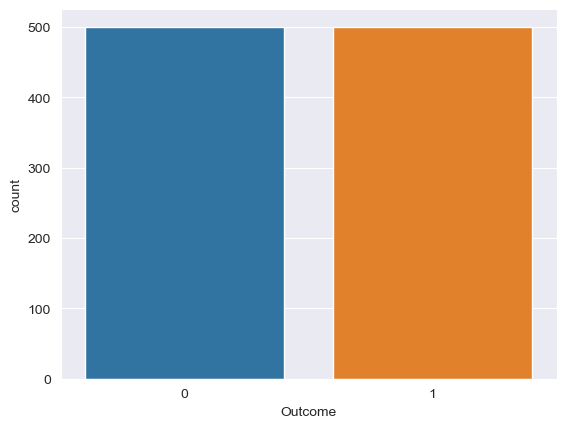

In [24]:
sns.countplot(data=data, x="Outcome")

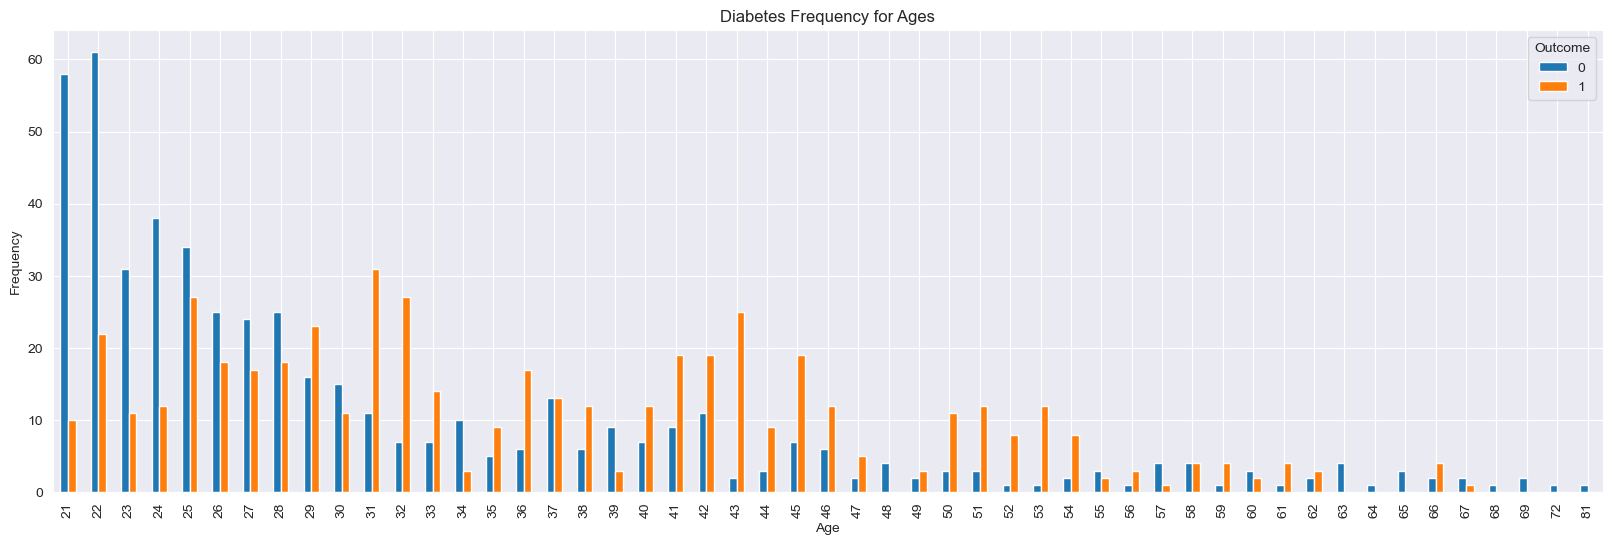

In [25]:

pd.crosstab(data.Age,data.Outcome).plot(kind="bar",figsize=(20,6))
plt.title('Diabetes Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

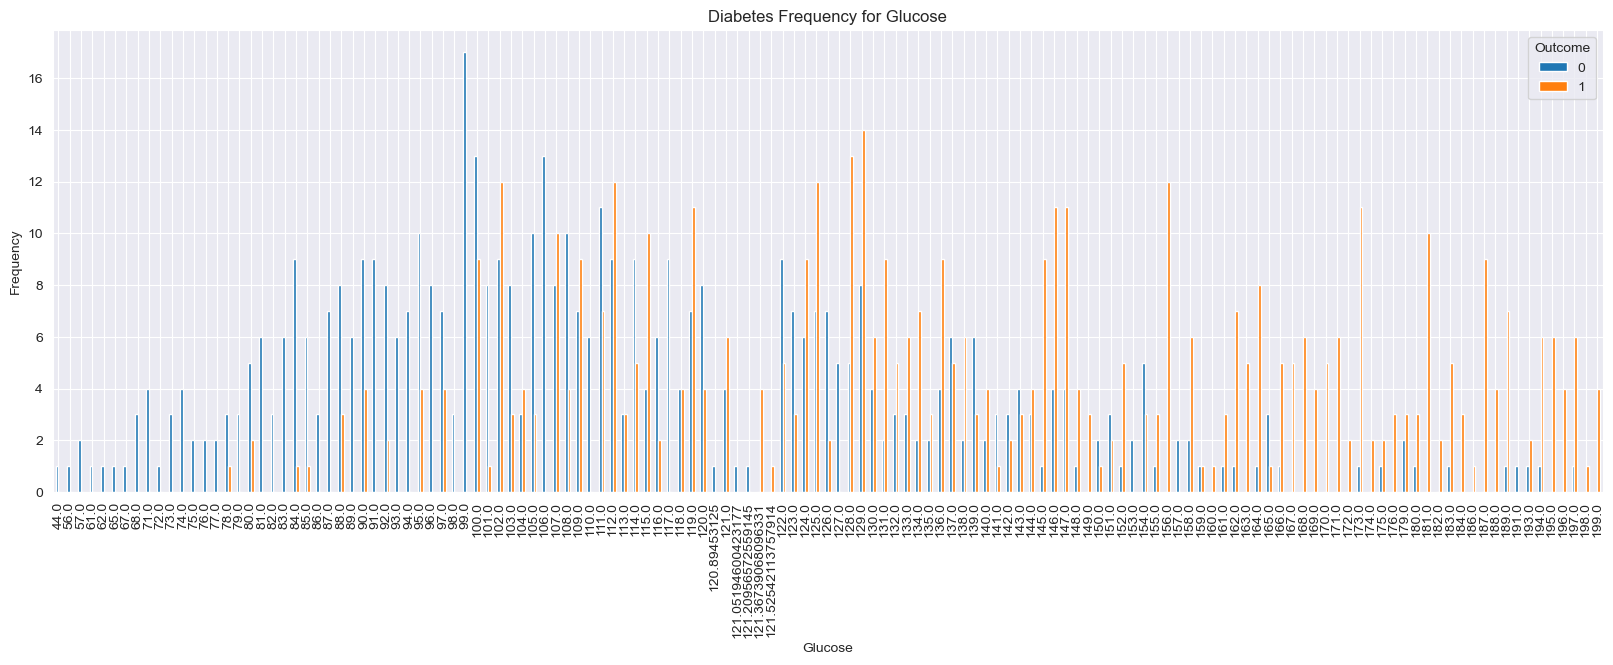

In [26]:
pd.crosstab(data.Glucose,data.Outcome).plot(kind="bar",figsize=(20,6))
plt.title('Diabetes Frequency for Glucose')
plt.xlabel('Glucose')
plt.ylabel('Frequency')
plt.show()

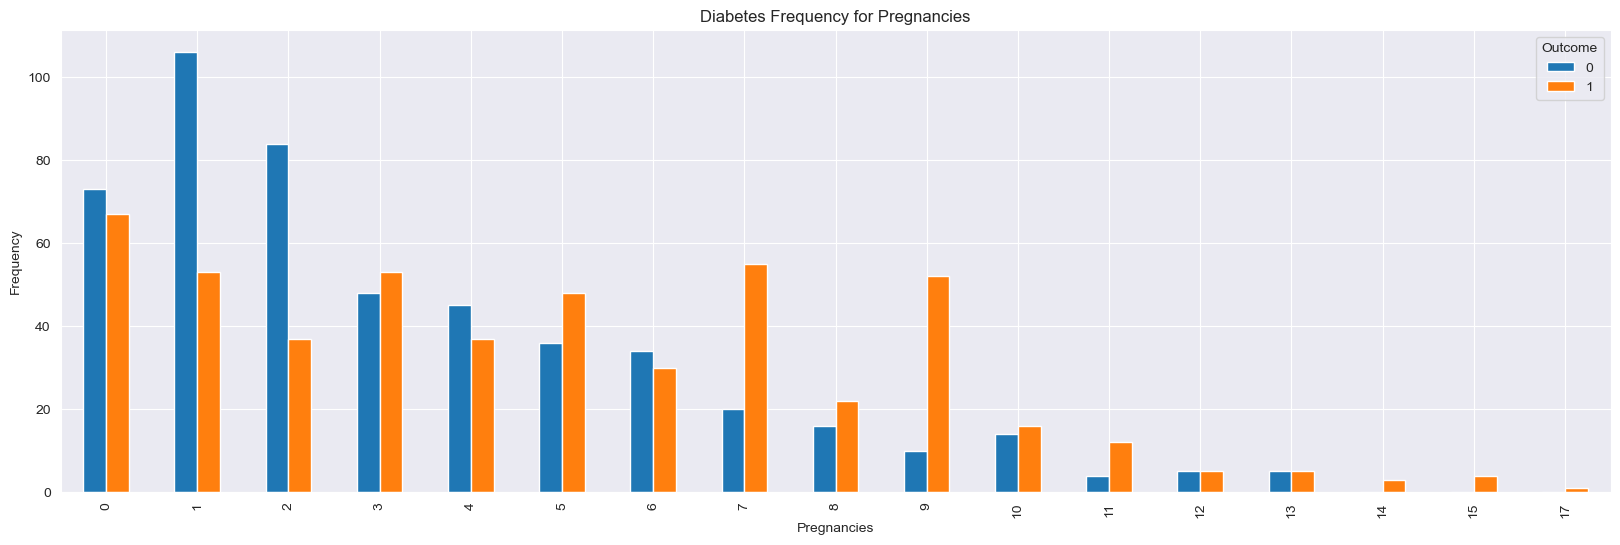

In [27]:
pd.crosstab(data.Pregnancies,data.Outcome).plot(kind="bar",figsize=(20,6))
plt.title('Diabetes Frequency for Pregnancies')
plt.xlabel('Pregnancies')
plt.ylabel('Frequency')
plt.show()

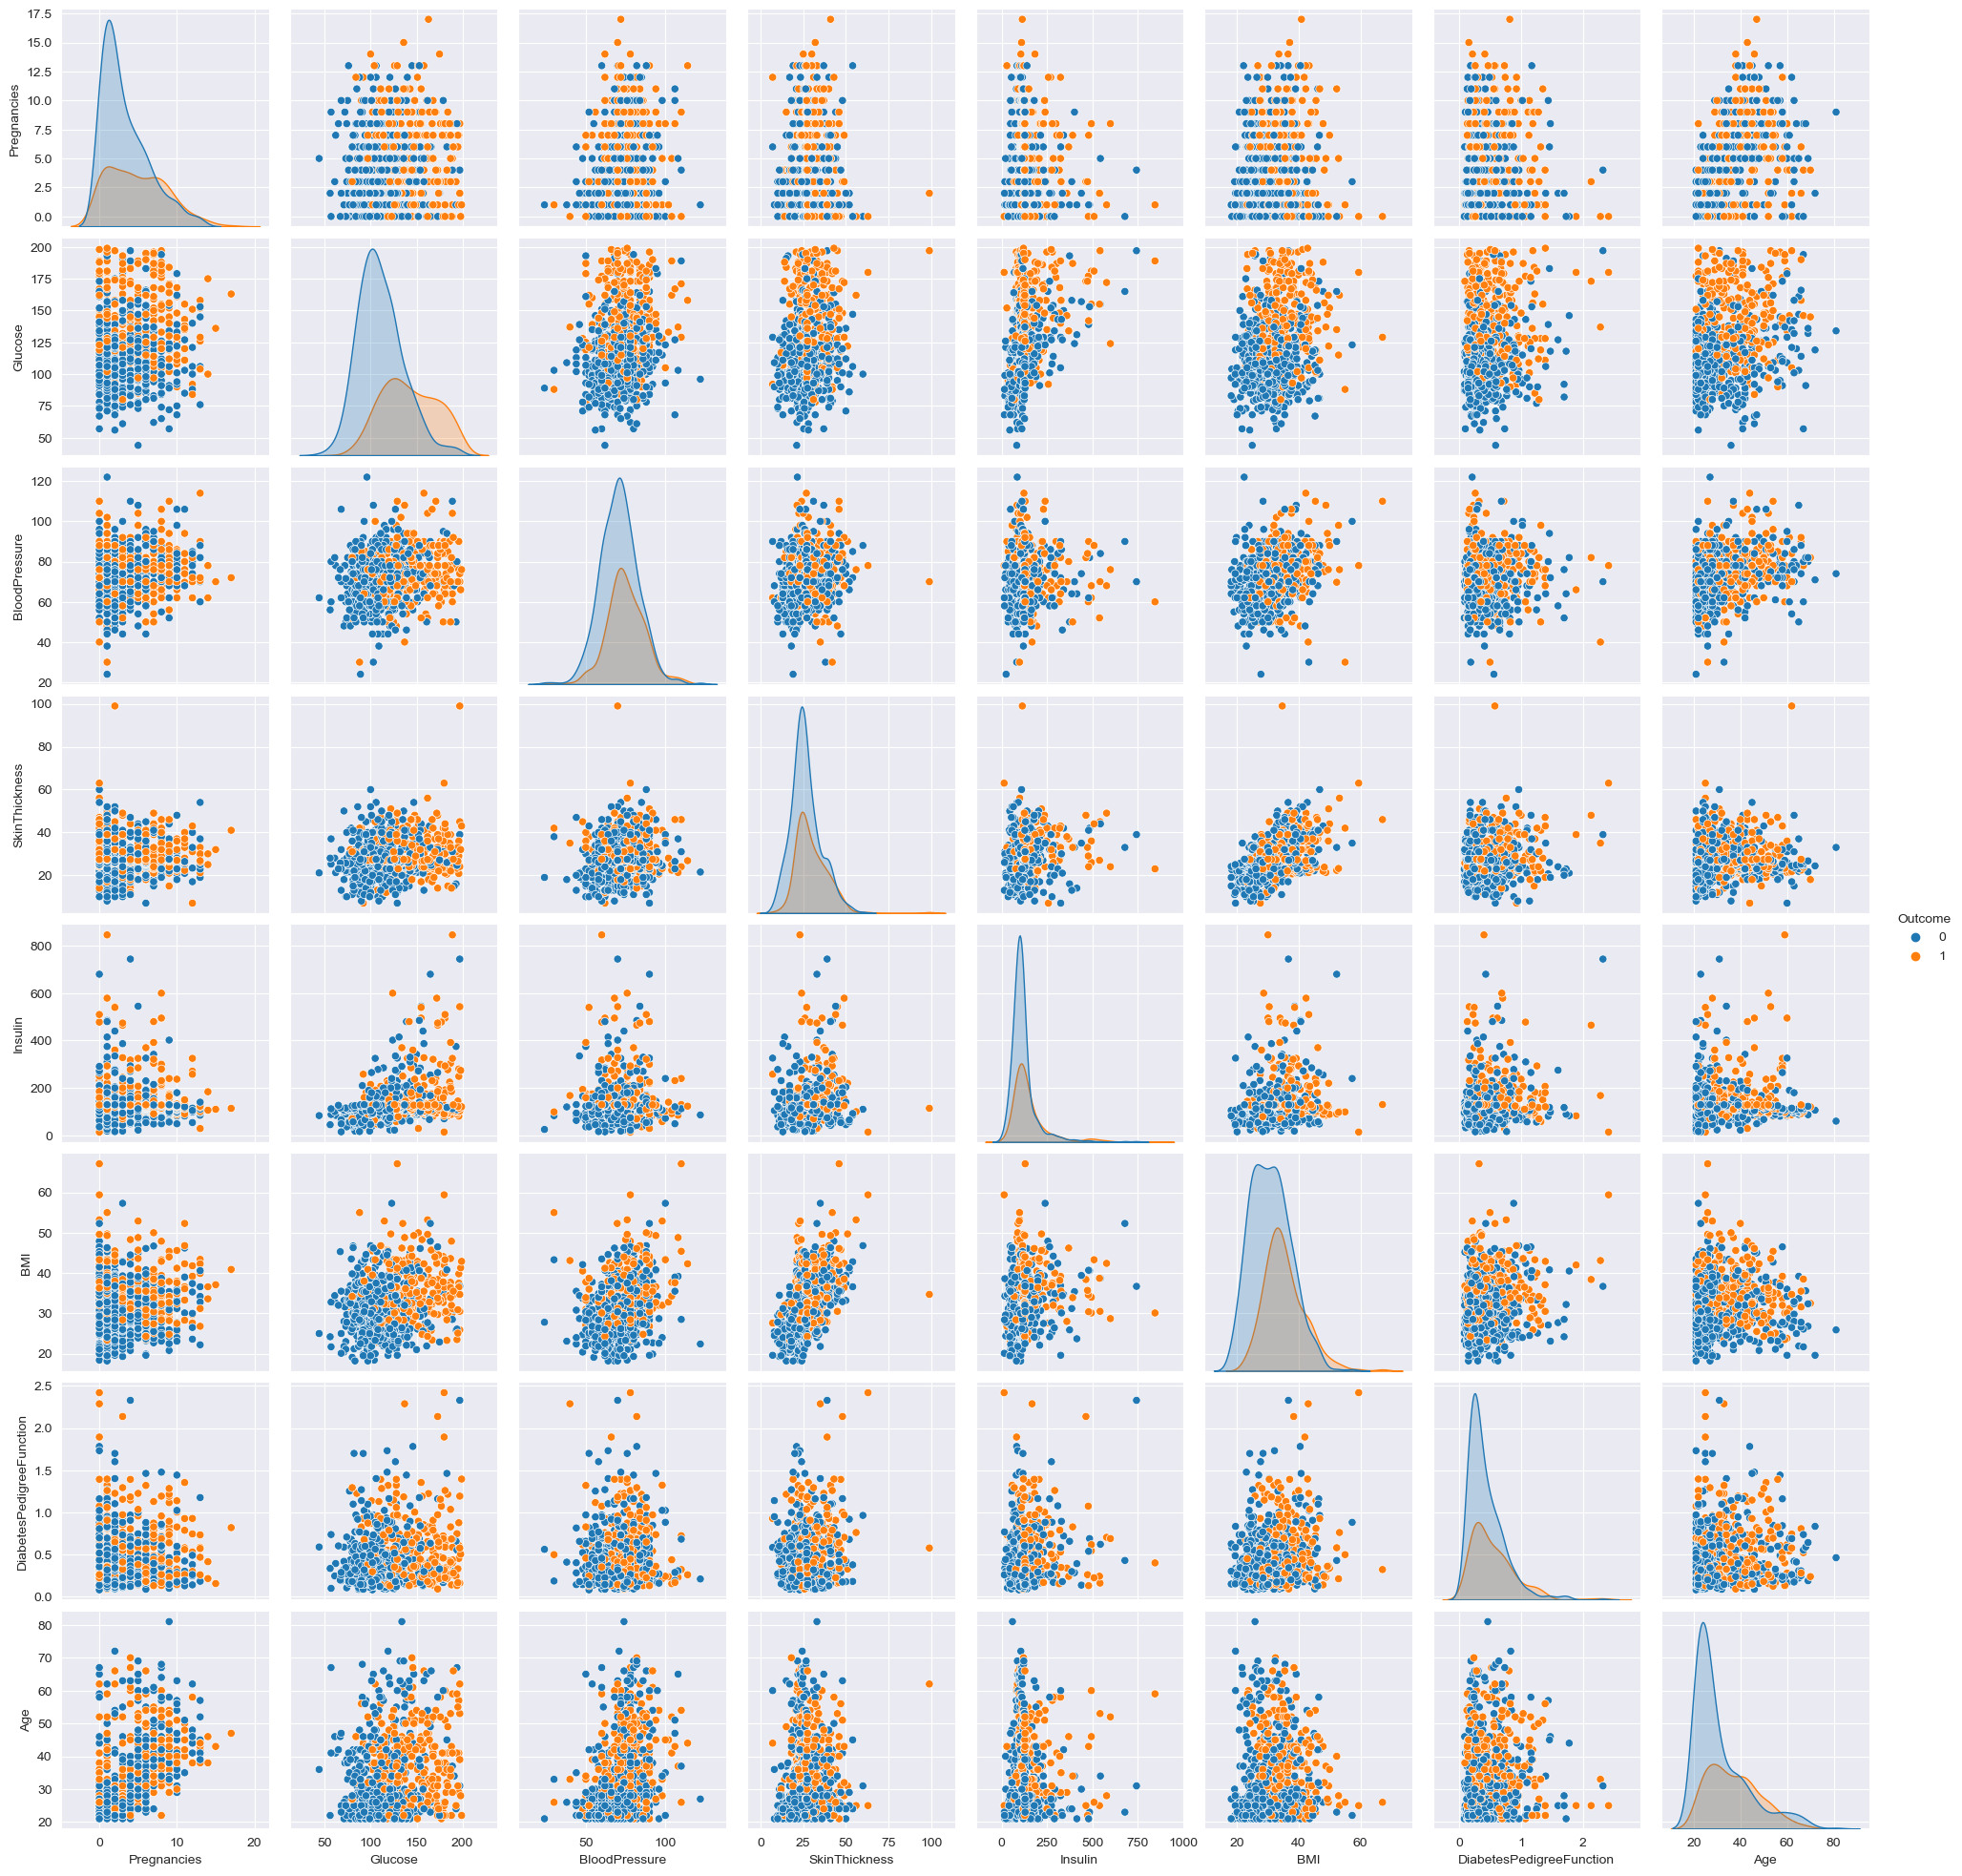

In [28]:
sns.pairplot(df, hue = 'Outcome')

In [29]:
scale = StandardScaler()

In [30]:

x = df.drop(['Outcome'], axis=1)
y = df['Outcome'].astype(float)
x=scale.fit_transform(x)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20, random_state = 0)

## KNN

In [31]:

classifier= KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')

#Fit the model for the data

classifier.fit(x_train, y_train)

#Make the prediction
y_pred = classifier.predict(x_test)
accuracy_KNN_without = accuracy_score(y_test,y_pred)*100

In [32]:
accuracy_KNN_without

77.92207792207793

In [33]:
#CSA
def fitness(variables_values = []):
    classifier= KNeighborsClassifier(n_neighbors=math.ceil(variables_values[0]), p=math.ceil(variables_values[1]), metric='minkowski')
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)*100
    return accuracy
def initial_population(population_size = 30, min_values = [5,1], max_values = [120,3], target_function = fitness):
    population = np.zeros((population_size, len(min_values) + 1))
    for i in range(0, population_size):
        for j in range(0, len(min_values)):
            population[i,j] = random.uniform(min_values[j], max_values[j]) 
        population[i,-1] = target_function(population[i, 0:population.shape[1]-1])
    return population
def update_position(population, ap, fL, min_values = [5,1], max_values = [120,3], target_function = fitness):
    for i in range(0, population.shape[0]):
        idx  = [i for i in range(0, population.shape[0])]
        idx.remove(i)
        idx  = random.choice(idx)
        rand = int.from_bytes(os.urandom(8), byteorder = 'big') / ((1 << 64) - 1)
        for j in range(0, len(min_values)):
            if (rand >= ap):
                rand_i           = int.from_bytes(os.urandom(8), byteorder = 'big') / ((1 << 64) - 1)
                population[i, j] = np.clip(population[i, j] + rand_i*fL*( population[idx, j] - population[i, j]), min_values[j], max_values[j])
            else:
                population[i,j] = random.uniform(min_values[j], max_values[j]) 
        population[i,-1] = target_function(population[i, 0:population.shape[1]-1])
    return population
def crow_search_algorithm(population_size = 30, ap = 0.02, fL = 2, min_values = [5,1], max_values = [120,3], iterations = 50, target_function = fitness):
    rem=[]
    count      = 0
    population = initial_population(population_size, min_values, max_values, target_function)
    best_ind   = np.copy(population[population[:,-1].argsort()][ 0,:])
    while (count <= iterations):  
        population = update_position(population, ap, fL, min_values, max_values, target_function)
        for i in range(0,population_size):
            value      = np.copy(population[i,:])
            rem.append(value)
            if(best_ind[-1] < value[-1]):
                best_ind = value
        count = count + 1 
    best_ind[1]=int(ceil(best_ind[1]))
    return best_ind,rem

In [34]:
resultat_KNN=crow_search_algorithm()
resultat_KNN

(array([29.10491025,  1.        , 83.11688312]),
 [array([16.19911412,  2.428858  , 80.51948052]),
  array([36.68493536,  1.        , 81.16883117]),
  array([69.42164857,  1.68754844, 80.51948052]),
  array([77.11435137,  2.24623486, 79.87012987]),
  array([25.23121514,  3.        , 81.81818182]),
  array([12.95123705,  2.66982689, 80.51948052]),
  array([71.35127494,  1.        , 77.92207792]),
  array([50.58328918,  2.75404898, 79.87012987]),
  array([79.67696966,  2.9195797 , 80.51948052]),
  array([120.        ,   1.74452159,  80.51948052]),
  array([51.45375125,  1.37010562, 81.81818182]),
  array([28.32800425,  3.        , 79.87012987]),
  array([62.19389308,  2.66308912, 80.51948052]),
  array([19.73201473,  2.92370099, 81.16883117]),
  array([78.47288954,  1.88394156, 81.16883117]),
  array([116.03753046,   2.15115117,  80.51948052]),
  array([80.60049569,  3.        , 80.51948052]),
  array([71.22903808,  1.67647235, 80.51948052]),
  array([71.77425476,  1.        , 77.9220779

In [35]:
resultat_KNN[0]#best position

array([29.10491025,  1.        , 83.11688312])

In [36]:
accuracy_KNN_withCSA=resultat_KNN[0][2]
accuracy_KNN_withCSA

83.11688311688312

In [37]:
ds=pd.DataFrame(data=resultat_KNN[1])
ds=ds.sort_values(by=[0,1])
ds=ds.drop_duplicates()
fig = px.scatter_3d(ds, x = 0, y = 1, z = 2)
fig.show()

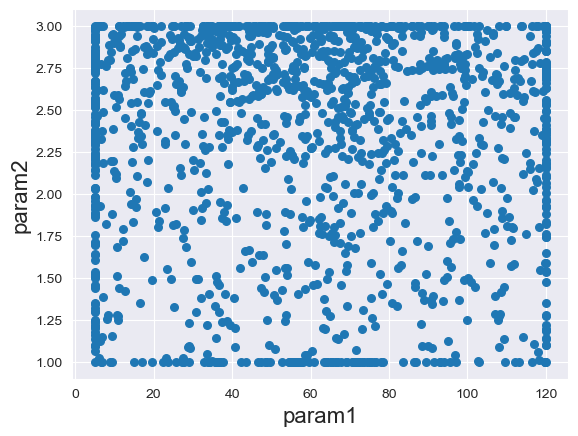

In [38]:
plt.scatter(ds[0], ds[1],s=30)
plt.xlabel('param1', fontsize=16)
plt.ylabel('param2', fontsize=16)
plt.show()

## RandomForest

In [39]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(max_depth=10,n_estimators =5)
classifier.fit(x_train, y_train)
y_pred_RF_sans = classifier.predict(x_test)
accuracy_RF_without = accuracy_score(y_test,y_pred_RF_sans)*100
print("accuracy=",accuracy_RF_without)
print("recall=",recall_score(y_test,y_pred))


accuracy= 75.97402597402598
recall= 0.6170212765957447


In [40]:
#csa
def fitness(variables_values = [3,8]):
    classifier = RandomForestClassifier(max_depth=math.ceil(variables_values[0]),n_estimators =math.ceil(variables_values[1]))
    classifier.fit(x_train, y_train)
    y_pred_RF_avec= classifier.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred_RF_avec)*100
    return accuracy
def initial_population(population_size = 5, min_values = [2,2], max_values = [100,10], target_function = fitness):
    population = np.zeros((population_size, len(min_values) + 1))
    for i in range(0, population_size):
        for j in range(0, len(min_values)):
            population[i,j] = random.uniform(min_values[j], max_values[j])
        population[i,-1] = target_function(population[i, 0:population.shape[1]-1])
    return population
def update_position(population, ap, fL, min_values = [2,2], max_values = [100,10], target_function = fitness):
    for i in range(0, population.shape[0]):
        idx  = [i for i in range(0, population.shape[0])]
        idx.remove(i)
        idx  = random.choice(idx)
        rand = int.from_bytes(os.urandom(8), byteorder = 'big') / ((1 << 64) - 1)
        for j in range(0, len(min_values)):
            if (rand >= ap):
                rand_i           = int.from_bytes(os.urandom(8), byteorder = 'big') / ((1 << 64) - 1)
                population[i, j] = np.clip(population[i, j] + rand_i*fL*( population[idx, j] - population[i, j]), min_values[j], max_values[j])
            else:
                population[i,j] = random.uniform(min_values[j], max_values[j])
        population[i,-1] = target_function(population[i, 0:population.shape[1]-1])
    return population
def crow_search_algorithm(population_size = 30, ap = 0.02, fL = 2, min_values = [2,2], max_values = [100,10], iterations = 80, target_function = fitness):
    rem=[]
    count      = 0
    population = initial_population(population_size, min_values, max_values, target_function)
    best_ind   = np.copy(population[population[:,-1].argsort()][ 0,:])
    while (count <= iterations):  
        population = update_position(population, ap, fL, min_values, max_values, target_function)
        for i in range(0,population_size):
            value      = np.copy(population[i,:])
            rem.append(value)
            if(best_ind[-1] < value[-1]):
                best_ind = value
        count = count + 1 
    best_ind[1]=int(ceil(best_ind[1]))
    return best_ind,rem

In [41]:
resultat_RF=crow_search_algorithm()
resultat_RF

(array([100.        ,   8.        ,  84.41558442]),
 [array([14.16908993,  9.72008655, 77.92207792]),
  array([87.03591039,  7.00013337, 78.57142857]),
  array([ 8.18747505, 10.        , 78.57142857]),
  array([100.        ,   4.31466209,  74.02597403]),
  array([100.        ,   8.95812836,  79.22077922]),
  array([82.48619533,  5.02391818, 79.22077922]),
  array([85.10405482,  4.25173538, 77.92207792]),
  array([37.89094715,  3.25289428, 72.72727273]),
  array([100.        ,   4.90651295,  80.51948052]),
  array([ 5.40921499,  9.99617191, 77.27272727]),
  array([77.044744  ,  5.04768459, 77.92207792]),
  array([100.        ,   2.        ,  71.42857143]),
  array([27.80301094,  4.70450894, 75.97402597]),
  array([ 5.62685851,  2.        , 70.12987013]),
  array([97.42372781,  5.6180871 , 75.97402597]),
  array([60.92138696, 10.        , 77.27272727]),
  array([ 2.        , 10.        , 72.07792208]),
  array([ 2.        ,  5.56333502, 75.97402597]),
  array([96.97741036,  4.75194187, 7

In [42]:
#best position
resultat_RF[0]

array([100.        ,   8.        ,  84.41558442])

In [43]:
accuracy_RF_withCSA=resultat_RF[0][2]
accuracy_RF_withCSA

84.4155844155844

In [44]:
ds=pd.DataFrame(data=resultat_RF[1])
ds=ds.sort_values(by=[0,1])
ds=ds.drop_duplicates()

  
fig = px.scatter_3d(ds, x = 0, 
                    y = 1, z = 2)
  
fig.show()

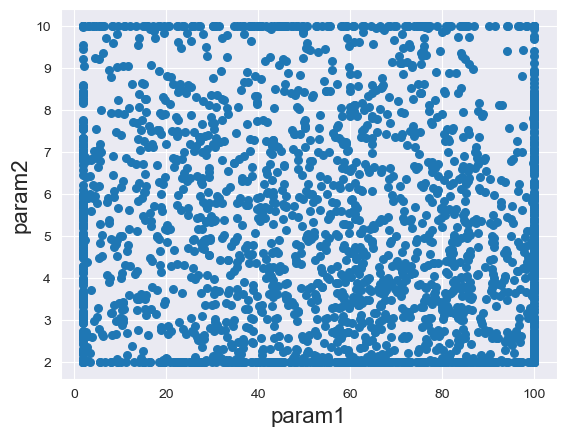

In [45]:
plt.scatter(ds[0], ds[1],s=30)
plt.xlabel('param1', fontsize=16)
plt.ylabel('param2', fontsize=16)
plt.show()

## Logistic Regression

In [46]:
x = df.drop(['Outcome'], axis=1)
y = df['Outcome'].astype(float)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20, random_state = 0)

In [47]:
clf = LogisticRegression()
clf.fit(x_train, y_train)
y_pred=clf.predict(x_test)
accuracy_RL_without = accuracy_score(y_test,y_pred)*100
accuracy_RL_without

79.87012987012987

In [48]:
#CSA
def fitness(variables_values = [1.0,0]):
    classifier = LogisticRegression(C=variables_values[0],random_state=ceil(variables_values[1]))
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)*100
    return accuracy
def initial_population(population_size = 5, min_values = [0.1,0], max_values = [1000.0,100], target_function = fitness):
    population = np.zeros((population_size, len(min_values) + 1))
    for i in range(0, population_size):
        for j in range(0, len(min_values)):
            population[i,j] = random.uniform(min_values[j], max_values[j]) 
        population[i,-1] = target_function(population[i, 0:population.shape[1]-1])
    return population
def update_position(population, ap, fL, min_values = [0.1,0], max_values = [1000.0,100], target_function = fitness):
    for i in range(0, population.shape[0]):
        idx  = [i for i in range(0, population.shape[0])]
        idx.remove(i)
        idx  = random.choice(idx)
        rand = int.from_bytes(os.urandom(8), byteorder = 'big') / ((1 << 64) - 1)
        for j in range(0, len(min_values)):
            if (rand >= ap):
                rand_i           = int.from_bytes(os.urandom(8), byteorder = 'big') / ((1 << 64) - 1)
                population[i, j] = np.clip(population[i, j] + rand_i*fL*( population[idx, j] - population[i, j]), min_values[j], max_values[j])
            else:
                population[i,j] = random.uniform(min_values[j], max_values[j]) 
        population[i,-1] = target_function(population[i, 0:population.shape[1]-1])
    return population
def crow_search_algorithm(population_size = 30, ap = 0.7, fL =5, min_values = [0.1,0], max_values = [1000.0,100], iterations = 20, target_function = fitness):
    rem=[]
    count      = 0
    population = initial_population(population_size, min_values, max_values, target_function)
    best_ind   = np.copy(population[population[:,-1].argsort()][ 0,:])
    while (count <= iterations):  
        population = update_position(population, ap, fL, min_values, max_values, target_function)
        for i in range(0,population_size):
            value      = np.copy(population[i,:])
            rem.append(value)
            if(best_ind[-1] < value[-1]):
                best_ind = value
        count = count + 1 
    best_ind[1]=int(ceil(best_ind[1]))
    return best_ind,rem

In [49]:
resultat_RL=crow_search_algorithm()
resultat_RL

(array([69.79176198, 25.        , 85.71428571]),
 [array([998.08300208,  57.8094313 ,  79.22077922]),
  array([485.7123771 ,  35.85649803,  81.16883117]),
  array([835.94429791,  97.10916454,  80.51948052]),
  array([ 0.1       , 63.98289644, 78.57142857]),
  array([982.69156803,  15.47658205,  80.51948052]),
  array([1000.        ,  100.        ,   79.87012987]),
  array([862.76773395, 100.        ,  79.87012987]),
  array([ 0.1       , 56.89969327, 78.57142857]),
  array([1000.        ,   90.05360545,   79.87012987]),
  array([687.45952071,   5.55553716,  79.87012987]),
  array([ 0.1       , 75.6203098 , 78.57142857]),
  array([ 4.38590016, 35.3676643 , 80.51948052]),
  array([827.02313978,  72.65032556,  79.22077922]),
  array([52.64600916, 55.82799126, 77.92207792]),
  array([368.00538131,  93.71332767,  80.51948052]),
  array([1000.        ,  100.        ,   79.87012987]),
  array([148.53525266,  81.01883903,  80.51948052]),
  array([179.20273079,  70.79835736,  81.16883117]),
  a

In [50]:
resultat_RL[0]

array([69.79176198, 25.        , 85.71428571])

In [51]:
accuracy_RL_withCSA=resultat_RL[0][2]
accuracy_RL_withCSA

85.71428571428571

In [52]:
ds=pd.DataFrame(data=resultat_RL[1])
ds=ds.sort_values(by=[0,1])
ds=ds.drop_duplicates()
fig = px.scatter_3d(ds, x = 0,y = 1, z = 2)
fig.show()

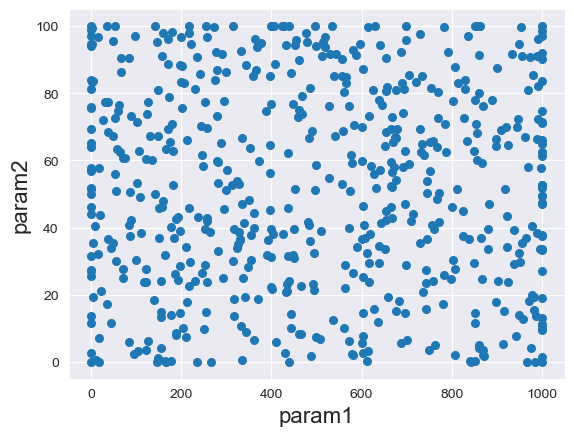

In [53]:
plt.scatter(ds[0], ds[1],s=30)
plt.xlabel('param1', fontsize=16)
plt.ylabel('param2', fontsize=16)
plt.show()

## Evaluation 

In [54]:
y1 = [accuracy_KNN_without, accuracy_RF_without, accuracy_RL_without] 
y2 = [accuracy_KNN_withCSA, accuracy_RF_withCSA, accuracy_RL_withCSA]

<Axes: xlabel='0', ylabel='1'>

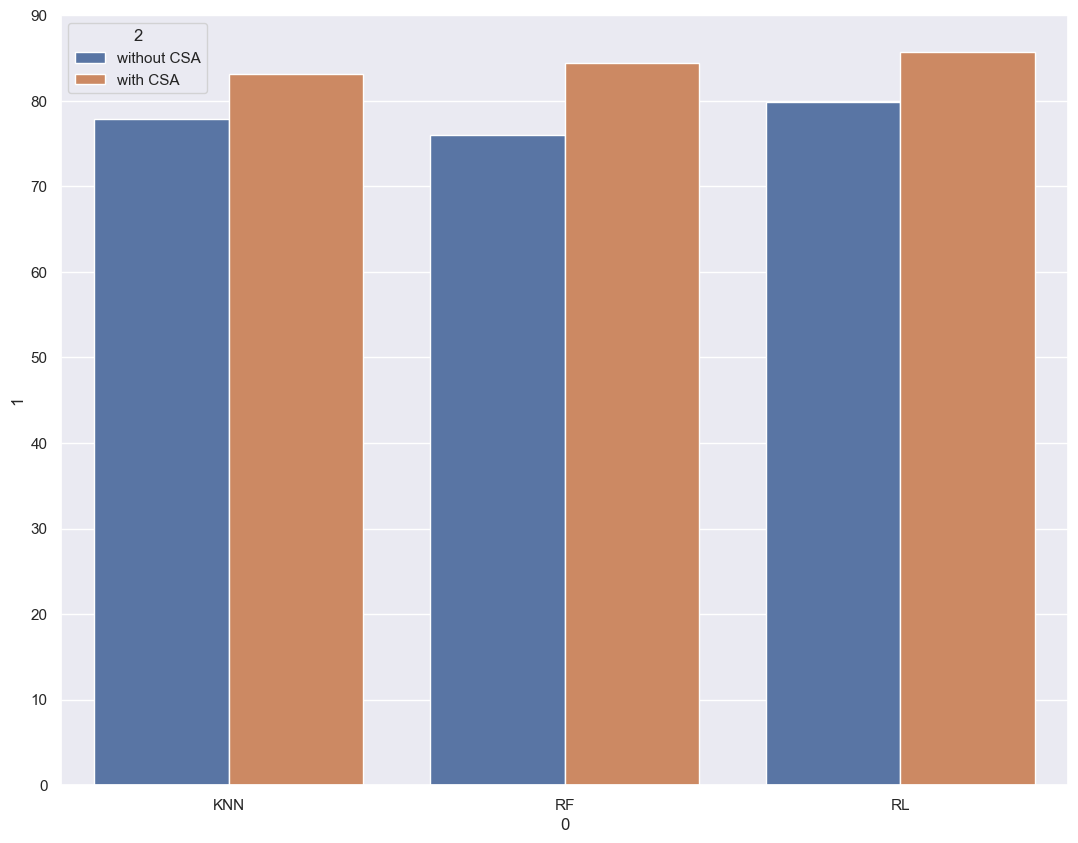

In [55]:
ds=[['KNN',y1[0],'without CSA'],['KNN',y2[0],'with CSA'],['RF',y1[1],'without CSA'],['RF',y2[1],'with CSA'],['RL',y1[2],'without CSA'],['RL',y2[2],'with CSA']]
ds=pd.DataFrame(ds)
sns.set(rc={'figure.figsize':(13,10)})
sns.barplot(data=ds, x=0, y=1, hue=2)

Making a Predictive System

In [56]:
input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = classifier.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[1.]
The person is diabetic


Saving the trained model

In [57]:
import pickle

In [58]:
filename = 'diabetes_model.sav'
pickle.dump(classifier, open(filename, 'wb'))

In [59]:
# loading the saved model
loaded_model = pickle.load(open('diabetes_model.sav', 'rb'))

In [60]:
input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = loaded_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[1.]
The person is diabetic


In [62]:
for column in x.columns:
  print(column)

Pregnancies
Glucose
BloodPressure
SkinThickness
Insulin
BMI
DiabetesPedigreeFunction
Age
